In [3]:
import tensorflow as tf
from tensorflow import keras


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
get_ipython().run_line_magic('matplotlib', 'inline')


In [11]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 8s 1us/step


In [12]:
len(x_train)


60000

In [13]:
len(x_test)


10000

In [14]:
x_train.shape

(60000, 28, 28)

In [15]:
x_test.shape

(10000, 28, 28)

In [16]:
x_train[0]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

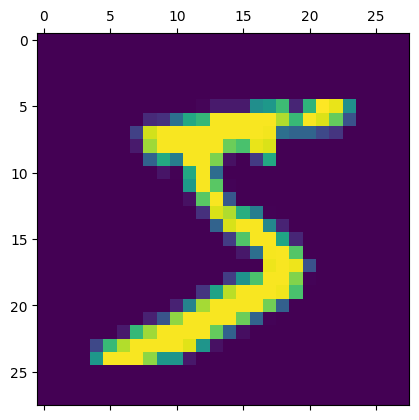

In [17]:
plt.matshow(x_train[0])


In [18]:
x_train = x_train / 255
x_test = x_test / 255
x_train[0]


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [19]:
model = keras.Sequential([
 keras.layers.Flatten(input_shape=(28, 28)),
 keras.layers.Dense(128, activation='relu'),
 keras.layers.Dense(10, activation='softmax')
])


C:\Users\vrushali halnor\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(optimizer='sgd',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])
history=model.fit(x_train, y_train,validation_data=(x_test,y_test),epochs=10)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8334 - loss: 0.6441 - val_accuracy: 0.9027 - val_loss: 0.3553
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9052 - loss: 0.3372 - val_accuracy: 0.9194 - val_loss: 0.2917
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9186 - loss: 0.2881 - val_accuracy: 0.9292 - val_loss: 0.2602
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9275 - loss: 0.2577 - val_accuracy: 0.9344 - val_loss: 0.2356
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9339 - loss: 0.2344 - val_accuracy: 0.9376 - val_loss: 0.2190
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9398 - loss: 0.2148 - val_accuracy: 0.9422 - val_loss: 0.2002
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9447 - loss: 0.1987 - val_accuracy: 0.9454 - val_loss: 0.1871
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9481 - loss: 0.1847 - 

In [22]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9526 - loss: 0.1602
Loss=0.160
Accuracy=0.953


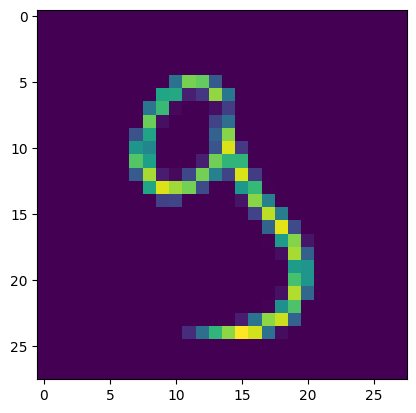

In [23]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()


In [24]:
predicted_value=model.predict(x_test)
print("Handwritten number in the image is= %d" %np.argmax(predicted_value[n]))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Handwritten number in the image is= 3


In [25]:
get_ipython().run_line_magic('pinfo2', 'history.history')

Type:        dict
String form: {'accuracy': [0.8334166407585144, 0.9051833152770996, 0.918583333492279, 0.9275333285331726, 0.9338833093643188, 0.9398000240325928, 0.9447333216667175, 0.9481333494186401, 0.9517333507537842, 0.9547833204269409], 'loss': [0.6440814733505249, 0.337224543094635, 0.288053959608078, 0.2576860785484314, 0.2343638390302658, 0.21482452750205994, 0.19874344766139984, 0.18467260897159576, 0.17247046530246735, 0.16179195046424866], 'val_accuracy': [0.9027000069618225, 0.9193999767303467, 0.9291999936103821, 0.9344000220298767, 0.9376000165939331, 0.9422000050544739, 0.9453999996185303, 0.9488999843597412, 0.9506999850273132, 0.9526000022888184], 'val_loss': [0.35529178380966187, 0.2916938364505768, 0.2602452039718628, 0.23559196293354034, 0.2189999520778656, 0.2002420723438263, 0.1871112436056137, 0.1754750907421112, 0.16723623871803284, 0.16015779972076416]}
Length:      4
Docstring:  
dict() -> new empty dictionary
dict(mapping) -> new dictionary initialized fro

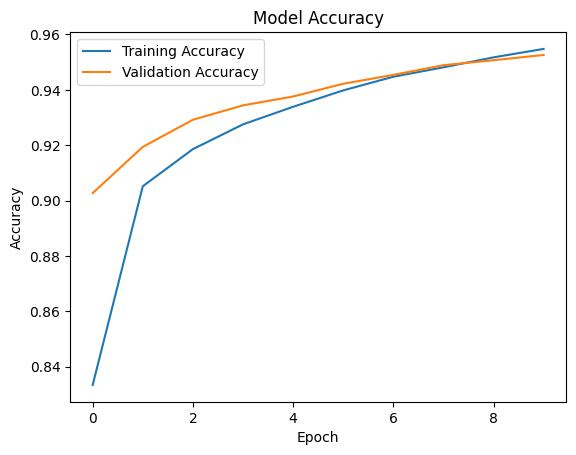

In [27]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


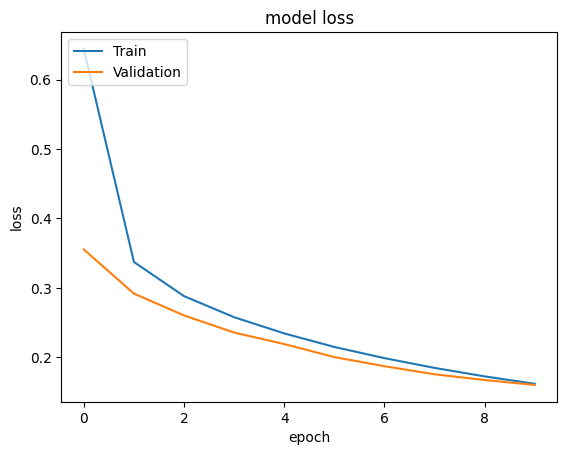

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


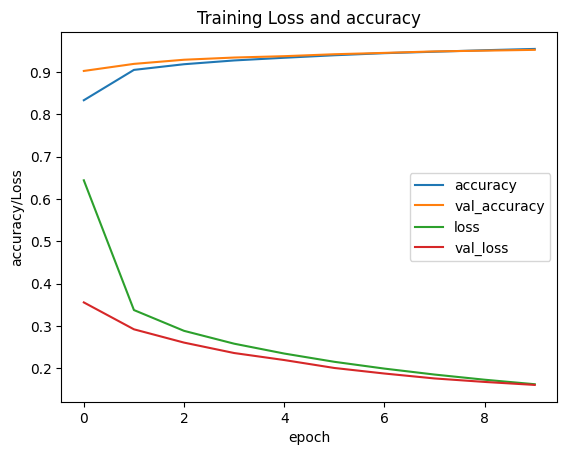

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss and accuracy')
plt.ylabel('accuracy/Loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy','loss','val_loss'])
plt.show()


In [30]:
keras_model_path = './model.h5'  
model.save(keras_model_path)


In [31]:
restored_keras_model = tf.keras.models.load_model(keras_model_path)